# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
CIFAR-10 dataset loaded successfully.


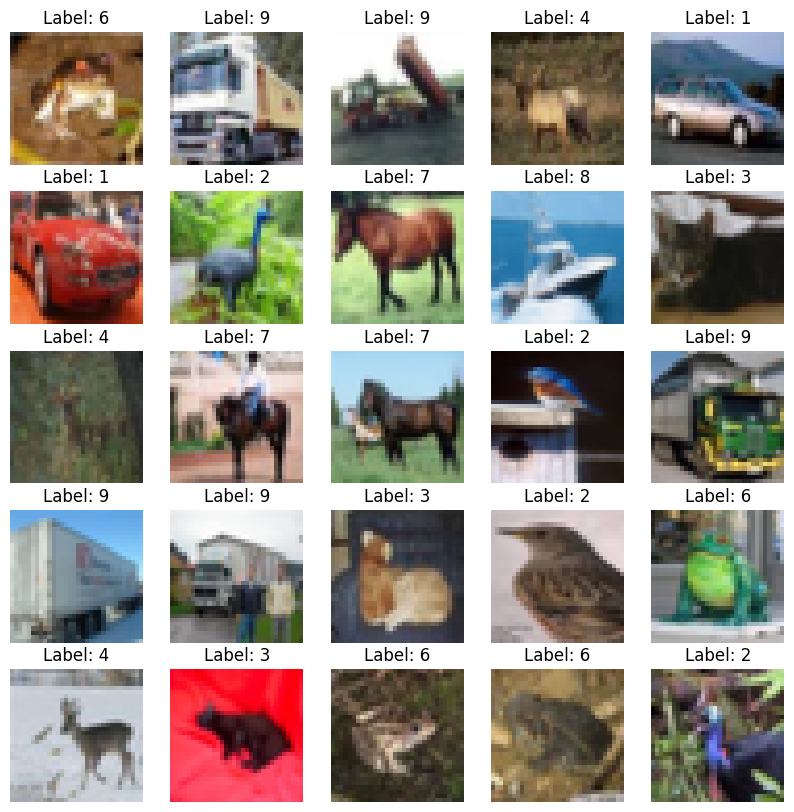

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

import time

max_retries = 3
retry_delay = 5  # seconds

for attempt in range(max_retries):
	try:
		# Load CIFAR-10 dataset
		(x_train, y_train), (x_test, y_test) = cifar10.load_data()
		print("CIFAR-10 dataset loaded successfully.")
		break  # If successful, exit the loop
	except Exception as e:
		print(f"Attempt {attempt + 1} failed: {e}")
		if attempt < max_retries - 1:
			print(f"Retrying in {retry_delay} seconds...")
			time.sleep(retry_delay)
		else:
			print("Max retries reached. Could not load CIFAR-10 dataset.")
			raise  # Re-raise the exception if all retries fail

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Display some sample images from the dataset	
plt.figure(figsize=(10, 10))
for i in range(25):
	ax = plt.subplot(5, 5, i + 1)
	plt.imshow(x_train[i])
	plt.title(f"Label: {np.argmax(y_train[i])}")
	plt.axis("off")


KeyboardInterrupt



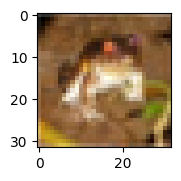

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(8, 8))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.tight_layout()
plt.show()

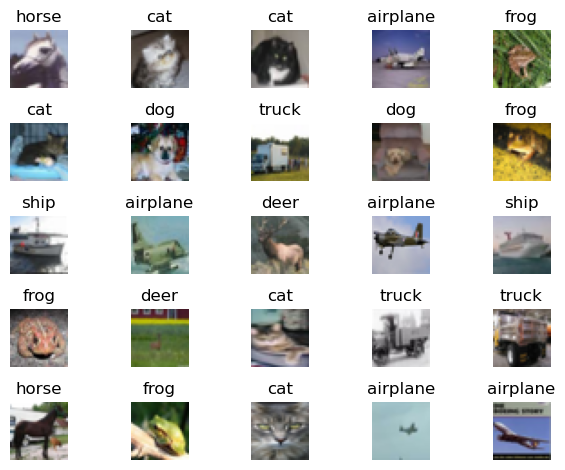

In [ ]:
import random

idxs = random.sample(range(len(x_train)), 25)
for i, idx in enumerate(idxs):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[y_train[idx][0]])
    plt.axis("off")
plt.tight_layout()
plt.show()

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# one-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test,  10)

# compile
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

# Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=512,
    validation_data=(x_test, y_test_cat),
    verbose=1
)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.1004 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.1004 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.1004 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.0996 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.1008 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 9/10
98/98

*   Plot the cross entropy loss curve and the accuracy curve

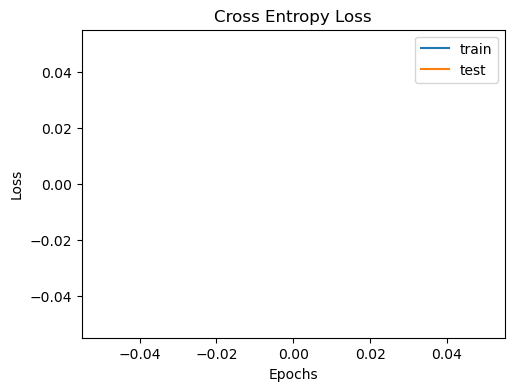

In [ ]:
# *   Plot the cross entropy loss curve and the accuracy curve
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# assume y_train_cat and y_test_cat are already one-hot encoded as before

model_vgg = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

history_vgg = model_vgg.fit(
    x_train, y_train_cat,
    epochs=2,
    batch_size=512,
    validation_data=(x_test, y_test_cat),
    verbose=1
)


Epoch 1/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 758ms/step - accuracy: 0.1004 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 2/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 634ms/step - accuracy: 0.1018 - loss: nan - val_accuracy: 0.1000 - val_loss: nan


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
from tensorflow.keras.optimizers import SGD

# compile with categorical_crossentropy, SGD optimizer, and accuracy metric
model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

# train for 50 epochs, batch size 512
history_vgg = model_vgg.fit(
    x_train, 
    y_train_cat,         # one-hot labels
    epochs=2, 
    batch_size=512, 
    validation_data=(x_test, y_test_cat),
    verbose=1
)


Epoch 1/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 764ms/step - accuracy: 0.1004 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 2/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 630ms/step - accuracy: 0.1005 - loss: nan - val_accuracy: 0.1000 - val_loss: nan


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

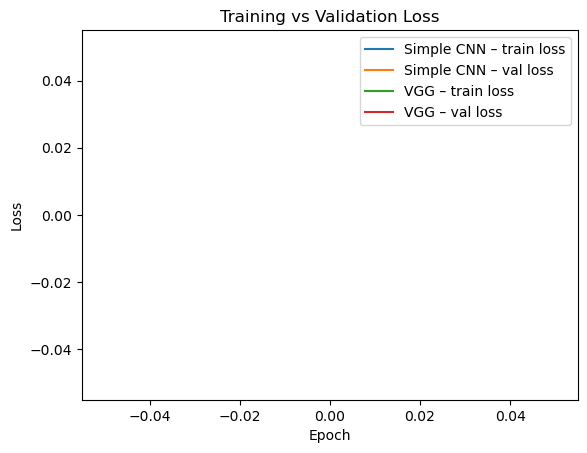

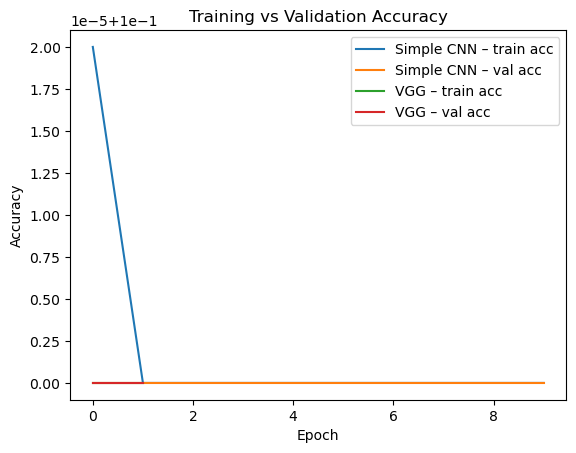

In [ ]:
import matplotlib.pyplot as plt

# --- LOSS CURVES ---
plt.figure()
plt.plot(history.history['loss'], label='Simple CNN – train loss')
plt.plot(history.history['val_loss'], label='Simple CNN – val loss')
plt.plot(history_vgg.history['loss'], label='VGG – train loss')
plt.plot(history_vgg.history['val_loss'], label='VGG – val loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- ACCURACY CURVES ---
plt.figure()
plt.plot(history.history['accuracy'], label='Simple CNN – train acc')
plt.plot(history.history['val_accuracy'], label='Simple CNN – val acc')
plt.plot(history_vgg.history['accuracy'], label='VGG – train acc')
plt.plot(history_vgg.history['val_accuracy'], label='VGG – val acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


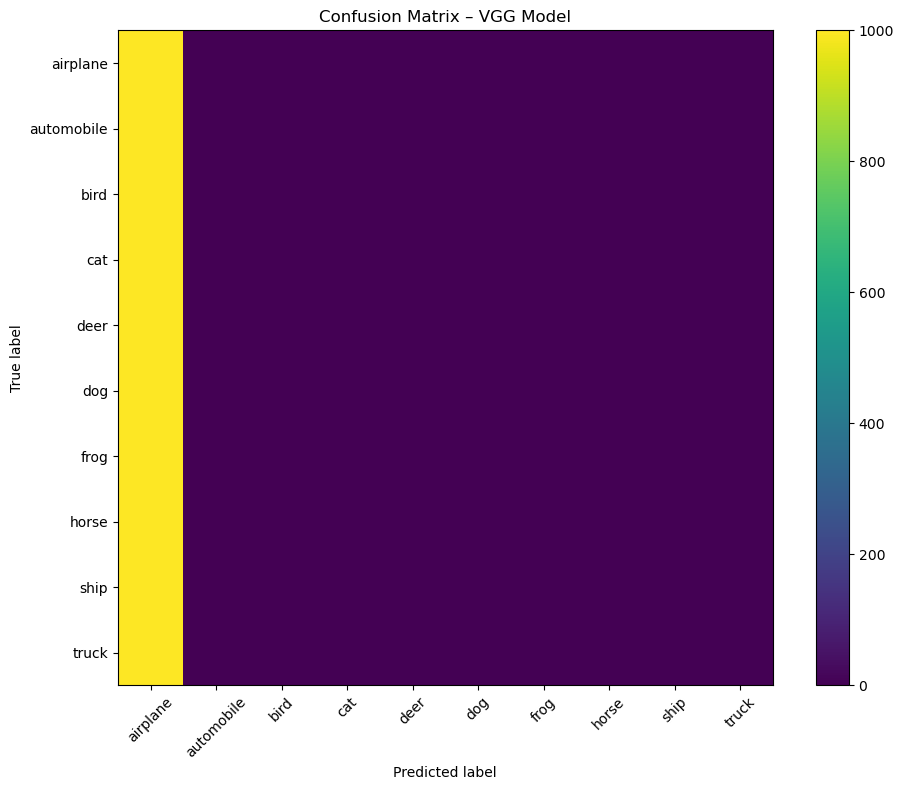

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# get predicted labels
y_pred = np.argmax(model_vgg.predict(x_test), axis=1)
y_true = np.argmax(y_test_cat,   axis=1)    # if you used one-hot encoding

# compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# plot
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix – VGG Model')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)
plt.colorbar()
plt.tight_layout()
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# evaluate VGG model
loss, acc = model_vgg.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {acc:.4f}")


Test accuracy: 0.1000


In [ ]:
loss2, acc2 = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Simple CNN test accuracy: {acc2:.4f}")


Simple CNN test accuracy: 0.1000


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_vgg_complete = Sequential([
    # Block 1: 2 × Conv(64) + Pool
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    
    # Block 2: 2 × Conv(128) + Pool
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    
    # Block 3: 2 × Conv(256) + Pool
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    
    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_vgg_complete.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Resize images to 64x64
x_train_resized = tf.image.resize(x_train, (64, 64)).numpy()
x_test_resized = tf.image.resize(x_test, (64, 64)).numpy()

# compile
model_vgg_complete.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

# train for 10 epochs, batch size 512
history_complete = model_vgg_complete.fit(
    x_train_resized, y_train_cat,
    epochs=2,
    batch_size=512,
    validation_data=(x_test_resized, y_test_cat),
    verbose=1
)

# test accuracy
loss, acc = model_vgg_complete.evaluate(x_test_resized, y_test_cat, verbose=0)
print(f"Test accuracy: {acc:.4f}")

# predict and confusion matrix
y_pred = np.argmax(model_vgg_complete.predict(x_test_resized), axis=1)
y_true = np.argmax(y_test_cat, axis=1)
cm = confusion_matrix(y_true, y_pred)

# plot
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix – Complete VGG')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(10), class_names, rotation=45)
plt.yticks(range(10), class_names)
plt.colorbar()
plt.tight_layout()
plt.show()


Epoch 1/2
11/98 ━━━━━━━━━━━━━━━━━━━━ 18:41 13s/step - accuracy: 0.0991 - loss: nan     

KeyboardInterrupt: 

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
Activation functions are crucial in neural networks because they introduce non-linearity, enabling complex pattern learning, control neuron activation, support gradient-based learning, prevent vanishing gradients, normalize outputs, and regulate information flow.


_

2 - Key Differences between sigmoid and softmax:

Sigmoid outputs values between 0 and 1 accross all outputs neurons. Softmax outputs values between 0 and 1 for each output neuron, but the sum of all outputs is equal to 1.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss: 
Binary crosstropy tipically paired with sigmoid activation. Categorical tipically paired with softmax activation.

_
